# Load Libraries

In [429]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Get the Data

In [430]:
df = pd.read_csv("payment_case_fin.csv", sep= ";")

# Investigate the Data

print(df.shape)
display(df.head())
display(df.dtypes)
display(df.describe())

(89460, 13)


,AgeClass,DurationClass,Rating,cube_level,payments_per_year,product1,product2,product3,product4,contact_info_edm,contact_info_tm,customers,FeatureInvestigated
0,Group4,5 to 6,Star,3,4,1,2,2,2,0,1,3,0
1,Group4,7 to 9,missing,?,1,0,2,0,0,0,1,1,0
2,Group3,7 to 9,Star,1,2,0,2,1,0,1,1,2,0
3,Group2,4,Star,1,4,0,1,1,1,0,1,1,0
4,Group2,20 to 29,missing,?,1,0,0,0,1,1,1,1,1


AgeClass               object
DurationClass          object
Rating                 object
cube_level             object
payments_per_year      object
product1                int64
product2                int64
product3                int64
product4                int64
contact_info_edm        int64
contact_info_tm         int64
customers               int64
FeatureInvestigated     int64
dtype: object

,product1,product2,product3,product4,contact_info_edm,contact_info_tm,customers,FeatureInvestigated
count,89460.000000,89460.000000,89460.000000,89460.000000,89460.000000,89460.000000,89460.000000,89460.000000
mean,0.673463,1.071954,0.928314,0.675509,0.673698,0.841605,10.072479,0.099206
std,0.715902,0.791714,0.825483,0.796875,0.468862,0.365113,50.863125,0.298941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,6.000000,0.000000
max,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,7306.000000,1.000000


# Get the number of levels from each category column

In [431]:
def count_levels(df):
    '''To count the number of unique labels from category variables'''
    cat_cols = df.select_dtypes(exclude = [np.number]).columns
    ncount = [df[x].nunique() for x in cat_cols]
    
    return pd.DataFrame(list(zip(cat_cols,ncount)), columns= ['features', 'counts'])

In [432]:
count_levels(df)

,features,counts
0,AgeClass,5
1,DurationClass,12
2,Rating,4
3,cube_level,5
4,payments_per_year,7


# Exploratory Analysis

## Distribution of Customers by FeatureInvestigated

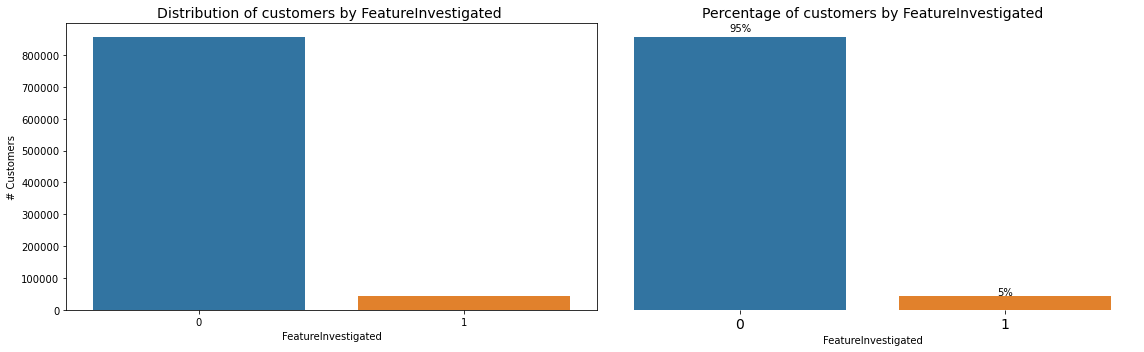

In [438]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
dataFrame =df.groupby(['FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'FeatureInvestigated', y='sum' , ax = ax[0], data = dataFrame)  
ax[0].set_ylabel("# Customers")
ax[0].set_title("Distribution of customers by FeatureInvestigated ", fontsize=14)

# 2nd plot

result = df.groupby(['FeatureInvestigated'])['customers'].sum().reset_index(name = 'count')
result['count'] = result['count'].apply(lambda x: x/result['count'].sum())
#colors_list = ['#5cb85c','#5bc0de']
#result.plot(kind='bar',width = 0.6,edgecolor=None, legend= None, ax= ax[1], rot= 0)
g = sns.barplot(x = 'FeatureInvestigated', y= 'count', data= result)
ax[1].set_ylabel('')
ax[1].set_title("Percentage of customers by FeatureInvestigated",fontsize= 14)

# Now set ax[1] as current axes
plt.sca(ax[1])

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values(): # gca means "get current axes"
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax[1].patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax[1].annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    
plt.tight_layout()
plt.savefig('fig1.png')
plt.show()

## Distribution of Customers by AgeClass and DurationClass

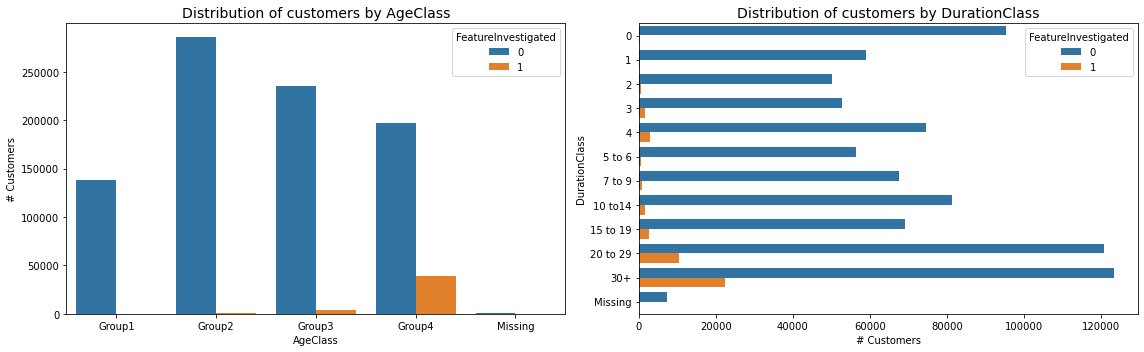

In [439]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
dataFrame =df.groupby(['AgeClass','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'AgeClass', y='sum' , hue='FeatureInvestigated', ax = ax[0], data = dataFrame) 
ax[0].set_ylabel("# Customers")
ax[0].set_title("Distribution of customers by AgeClass", fontsize=14)

# 2nd plot

dataFrame =df.groupby(['DurationClass','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
sort_distClass = ['0', '1', '2', '3', '4', '5 to 6', '7 to 9', '10 to14', '15 to 19', '20 to 29', '30+', 'Missing']
dataFrame.DurationClass = dataFrame.DurationClass.astype("category")
dataFrame.DurationClass.cat.set_categories(sort_distClass, inplace=True)
dataFrame.sort_values(["DurationClass"], inplace = True)

g= sns.barplot(x = 'sum', y='DurationClass' , hue='FeatureInvestigated', ax = ax[1], data = dataFrame)
ax[1].set_xlabel('# Customers')
ax[1].set_title("Distribution of customers by DurationClass",fontsize= 14)

    
plt.tight_layout()
plt.savefig("fig2.png")
plt.show()

## Distribution of Customers by Rating, Cube_Level and Payments_per_year

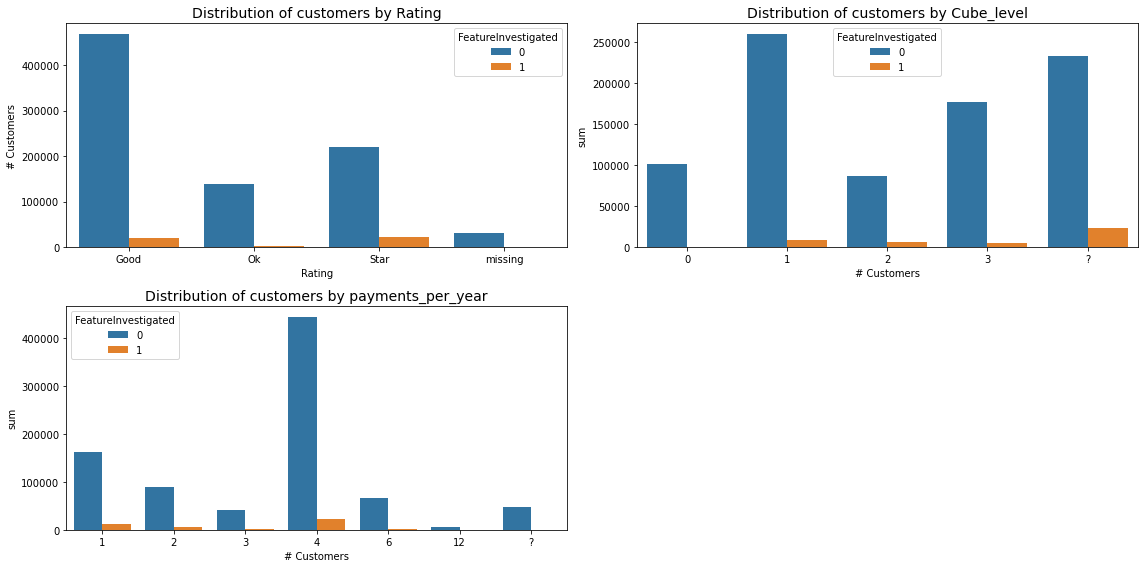

In [440]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2,figsize=(16,8))

# 1st plot
dataFrame =df.groupby(['Rating','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'Rating', y='sum' , hue='FeatureInvestigated', ax = ax1, data = dataFrame)
ax1.set_ylabel("# Customers")
ax1.set_title("Distribution of customers by Rating", fontsize=14)

# 2nd plot

dataFrame =df.groupby(['cube_level','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'cube_level', y='sum' , hue='FeatureInvestigated', ax = ax2, data = dataFrame)
ax2.set_xlabel('# Customers')
ax2.set_title("Distribution of customers by Cube_level",fontsize= 14)


# 3rd plot

dataFrame =df.groupby(['payments_per_year','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
sort_payment = ['1', '2', '3', '4', '6', '12', '?']
dataFrame.payments_per_year = dataFrame.payments_per_year.astype("category")
dataFrame.payments_per_year.cat.set_categories(sort_payment, inplace=True)
dataFrame.sort_values(["payments_per_year"], inplace = True)

g= sns.barplot(x = 'payments_per_year', y='sum' , hue='FeatureInvestigated', ax = ax3, data = dataFrame)
ax3.set_xlabel('# Customers')
ax3.set_title("Distribution of customers by payments_per_year",fontsize= 14)

ax4.axis('off')

plt.tight_layout()
plt.savefig("fig3.png")
plt.show()

## Distribution of Customers by Products

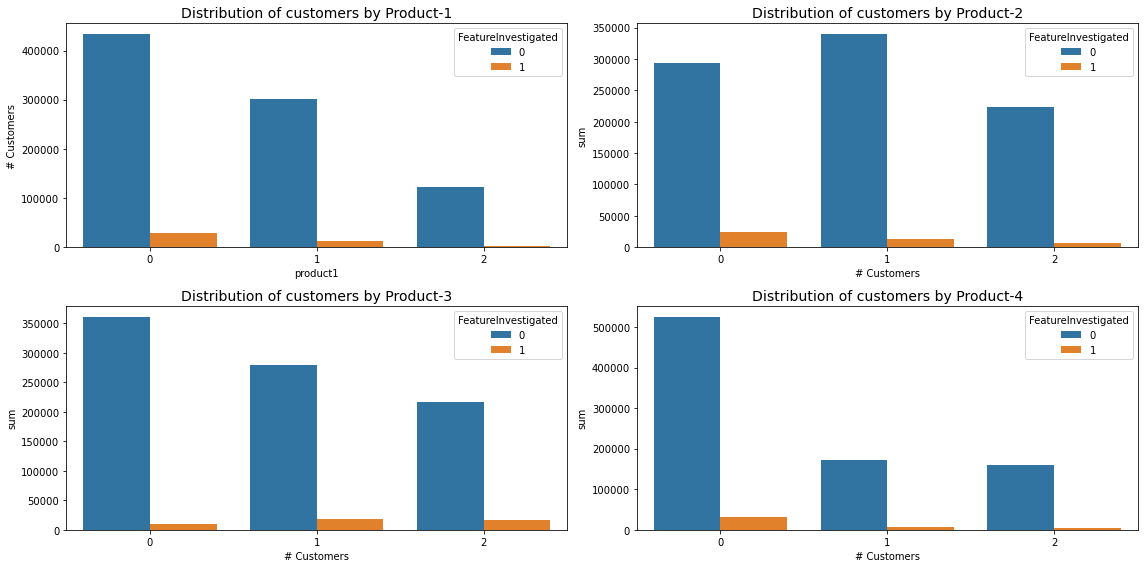

In [441]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2,figsize=(16,8))

# 1st plot
dataFrame =df.groupby(['product1','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'product1', y='sum' , hue='FeatureInvestigated', ax = ax1, data = dataFrame)
ax1.set_ylabel("# Customers")
ax1.set_title("Distribution of customers by Product-1", fontsize=14)

# 2nd plot

dataFrame =df.groupby(['product2','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'product2', y='sum' , hue='FeatureInvestigated', ax = ax2, data = dataFrame)
ax2.set_xlabel('# Customers')
ax2.set_title("Distribution of customers by Product-2",fontsize= 14)

# 3rd plot

dataFrame =df.groupby(['product3','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'product3', y='sum' , hue='FeatureInvestigated', ax = ax3, data = dataFrame)
ax3.set_xlabel('# Customers')
ax3.set_title("Distribution of customers by Product-3",fontsize= 14)

# 4th plot

dataFrame =df.groupby(['product4','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'product4', y='sum' , hue='FeatureInvestigated', ax = ax4, data = dataFrame)
ax4.set_xlabel('# Customers')
ax4.set_title("Distribution of customers by Product-4",fontsize= 14)


plt.tight_layout()
plt.savefig("fig4.png")
plt.show()

## Distribution of Customers by contact_info_edm and contact_info_tm

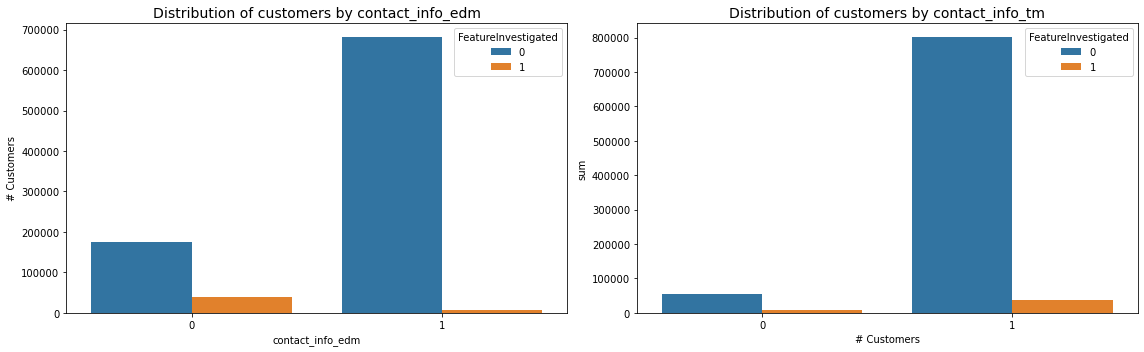

In [442]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))

# 1st plot
dataFrame =df.groupby(['contact_info_edm','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'contact_info_edm', y='sum' , hue='FeatureInvestigated', ax = ax[0], data = dataFrame)
ax[0].set_ylabel("# Customers")
ax[0].set_title("Distribution of customers by contact_info_edm", fontsize=14)

# 2nd plot

dataFrame =df.groupby(['contact_info_tm','FeatureInvestigated'])['customers'].agg({'sum'}).reset_index()
g= sns.barplot(x = 'contact_info_tm', y='sum' , hue='FeatureInvestigated', ax = ax[1], data = dataFrame)
ax[1].set_xlabel('# Customers')
ax[1].set_title("Distribution of customers by contact_info_tm",fontsize= 14)

    
plt.tight_layout()
plt.savefig("fig5.png")
plt.show()

The customers who came via channel telemarketing basically have this payment option.

# Decision Tree to understand data (R codes)

In [443]:
import os
os.environ["R_HOME"] = r"C:\\Users\\masud.pervez\\Anaconda3\\envs\\rstudio\\Lib\\R"
os.environ["PATH"]   = r"C:\\Users\\masud.pervez\\Anaconda3\\envs\\rstudio\\Lib\\R\\bin\\x64" + ";" + os.environ["PATH"]
import rpy2

import rpy2.robjects as robjects

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [382]:
#%%R -i df
#library(rpart)
#library(rpart.plot)

#ggplot(df, aes(x=AgeClass, y=customers)) + geom_bar(stat="identity") + coord_flip()

In [444]:
%R str(df)

'data.frame':	89460 obs. of  13 variables:
 $ AgeClass           : Factor w/ 5 levels "Group1","Group2",..: 4 4 3 2 2 4 3 3 4 2 ...
 $ DurationClass      : Factor w/ 12 levels "0","1","2","3",..: 6 7 7 5 10 2 10 8 2 5 ...
 $ Rating             : Factor w/ 4 levels "Ok","Good","Star",..: 3 4 3 3 4 2 2 3 3 2 ...
 $ cube_level         : Factor w/ 5 levels "0","1","2","3",..: 4 5 2 2 5 5 3 2 4 3 ...
 $ payments_per_year  : Factor w/ 7 levels "1","2","3","4",..: 4 1 2 4 1 7 5 4 4 4 ...
 $ product1           : Factor w/ 3 levels "0","1","2": 2 1 1 1 1 2 3 3 2 2 ...
 $ product2           : Factor w/ 3 levels "0","1","2": 3 3 3 2 1 2 3 3 3 2 ...
 $ product3           : Factor w/ 3 levels "0","1","2": 3 1 2 2 1 2 1 2 3 1 ...
 $ product4           : Factor w/ 3 levels "0","1","2": 3 1 1 2 2 2 3 3 2 1 ...
 $ contact_info_edm   : Factor w/ 2 levels "0","1": 1 1 2 1 2 2 2 2 2 2 ...
 $ contact_info_tm    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ customers          : int  3 1 2 1 1 1 1

In [446]:
%%R -i df
library(rpart)
library(rpart.plot)

df$AgeClass <- factor(df$AgeClass, levels=c("Group1", "Group2", "Group3", "Group4", "Missing"))
df$DurationClass <- factor(df$DurationClass, levels= c("0", "1", "2", "3", "4","5 to 6", "7 to 9", "10 to14",
                                                          "15 to 19", "20 to 29", "30+", "Missing") )
df$Rating <- factor(df$Rating, levels= c('Ok', 'Good', 'Star', 'missing'))
df$cube_level <- factor(df$cube_level, levels= c('0', '1', '2', '3', '?'))
df$payments_per_year <- factor(df$payments_per_year, levels= c('1', '2', '3', '4', '6', '12', '?'))
df$product1 <- as.factor(df$product1)
df$product2 <- as.factor(df$product2)
df$product3 <- as.factor(df$product3)
df$product4 <- as.factor(df$product4)

df$contact_info_edm <- factor(df$contact_info_edm, levels = c(0, 1))

df$contact_info_tm <- factor(df$contact_info_tm, levels = c(0, 1))

df$FeatureInvestigated <- as.factor(df$FeatureInvestigated)

print(str(df))

message("Creating Decision Tree..........\n")
control <- rpart.control(#maxdepth = 10,  # maximum depth of the tree, with the root node counted as depth 0.
      #maxcompete = 5,
      minbucket = 200,
      cp = 0.0,
      maxsurrogate = 0,
      usesurrogate = 0,
      xval = 10 # number of cross-validations.
    )

fit <- rpart(FeatureInvestigated ~ .,
                 data = df,
                 method = 'class',
                 control = control)
    
   
#setwd("C:/Users/masud.pervez/Document/")

#pdf(paste0("DecisionTree", "_", title_name, ".pdf"), width =12, height =10) # width & height are in inch
# in jped format
jpeg(paste0("DecisionTree",".jpg"), width = 1200, height = 900)
rpart.plot(fit, extra = 102, cex= 0.9, main = "Decision Tree")

dev.off()

message("Job done successful!!!!!!!\n")

'data.frame':	89460 obs. of  13 variables:
 $ AgeClass           : Factor w/ 5 levels "Group1","Group2",..: 4 4 3 2 2 4 3 3 4 2 ...
 $ DurationClass      : Factor w/ 12 levels "0","1","2","3",..: 6 7 7 5 10 2 10 8 2 5 ...
 $ Rating             : Factor w/ 4 levels "Ok","Good","Star",..: 3 4 3 3 4 2 2 3 3 2 ...
 $ cube_level         : Factor w/ 5 levels "0","1","2","3",..: 4 5 2 2 5 5 3 2 4 3 ...
 $ payments_per_year  : Factor w/ 7 levels "1","2","3","4",..: 4 1 2 4 1 7 5 4 4 4 ...
 $ product1           : Factor w/ 3 levels "0","1","2": 2 1 1 1 1 2 3 3 2 2 ...
 $ product2           : Factor w/ 3 levels "0","1","2": 3 3 3 2 1 2 3 3 3 2 ...
 $ product3           : Factor w/ 3 levels "0","1","2": 3 1 2 2 1 2 1 2 3 1 ...
 $ product4           : Factor w/ 3 levels "0","1","2": 3 1 1 2 2 2 3 3 2 1 ...
 $ contact_info_edm   : Factor w/ 2 levels "0","1": 1 1 2 1 2 2 2 2 2 2 ...
 $ contact_info_tm    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ customers          : int  3 1 2 1 1 1 1

R[write to console]: Creating Decision Tree..........


R[write to console]: Job done successful!!!!!!!




# Consequences

In [425]:
# Calculating percentage of customers by FeatureInvestigated removing Group4 AgeClass from df.

tmpgrp = df[df.AgeClass != 'Group4'].groupby('FeatureInvestigated')
tmpgrp = tmpgrp[["customers"]].sum().add_prefix("Sum_of_").reset_index()
tmpgrp['%_of_customers']=tmpgrp[['Sum_of_customers']].apply(lambda x: x/x.sum())
tmpgrp

,FeatureInvestigated,Sum_of_customers,%_of_customers
0,0,660106,0.992697
1,1,4856,0.007303


In [428]:
# Calculating percentage of customers by FeatureInvestigated for Group4 AgeClass only in df.

tmpgrp = df[df.AgeClass == 'Group4'].groupby('FeatureInvestigated')
tmpgrp= tmpgrp[['customers']].sum().add_prefix("Sum_of_").reset_index()
tmpgrp['_of_customers']=tmpgrp[['Sum_of_customers']].apply(lambda x: x/x.sum())
tmpgrp

,FeatureInvestigated,Sum_of_customers,_of_customers
0,0,196837,0.833624
1,1,39285,0.166376


In [449]:
df.groupby('AgeClass').apply(lambda x: np.average(x.FeatureInvestigated, weights= x.customers))

AgeClass
Group1     0.000493
Group2     0.002657
Group3     0.016365
Group4     0.166376
Missing    0.086887
dtype: float64

In [447]:
(196837+39285)

236122

In [478]:
4856/(660106+4856)

0.007302672934694013

## Statistical Test

Now, if someone claims that the risk is no more than 17% for the customers in age group 4. To test this statement I conduct the following significance test:


In [477]:
from scipy.stats import binom_test

# In order to conduct a test we need our three inputs.
# Nul hypotheses is whether the risk is equal to a hypothesize value, say 17%. 
# The two other inputs are the number of total observations (n) and 
# the number of success [i.e. FeatureInvestigated=1] (x)

# To run the test (i.e. calculating the p-value of our test):
print(f'p-value: {binom_test(x = 39285, n = 236122, p=0.17, alternative="greater")}')

p-value: 0.9999987229900329


We use a one-tailed test with null and alternative hypotheses:

$H_0 : p <= 0.17$

$H_a : p > 0.17$

As the calculated p-value (0.9999987229900329) is greate than 0.05 (level of significance= 5%) we cann't reject the null hypothesis and conclude that with 95% confidence the risk of customers is not greater than 17%.


In [393]:
(196837+39285)*0.2

47224.4

In [411]:
??binom_test

# Convert to numeric

In [121]:
def convert_to_int(agegrp):
    grp_dic= {'Missing': 0, 'Group1': 1, 'Group2': 2, 'Group3': 3, 'Group4':4}
    return grp_dic[agegrp]

df_copy['AgeClass']= df['AgeClass'].apply(lambda x: convert_to_int(x))

In [ ]:
def convert_to_int_duration(duration):
    duration_dic = {"0": 0, "1": 1, "2":2, "3":3, "4":4,"5 to 6":6, "7 to 9":9, "10 to14":1,
                                                          "15 to 19", "20 to 29", "30+", "Missing"}

In [71]:
df['cube_level'].replace('?', '4', inplace = True) # 4 for missing values
df['cube_level']= df['cube_level'].astype(str).astype(int)
df['payments_per_year'].replace('?', '0', inplace = True) # 0 for missing values
df['payments_per_year']= df['payments_per_year'].astype(str).astype(int)

In [81]:
df[['cube_level', 'payments_per_year']]= df[['cube_level', 'payments_per_year']].replace('?', np.nan) 
df[['cube_level', 'payments_per_year']]= df[['cube_level', 'payments_per_year']].astype(str).astype(float)

<Figure size 720x288 with 0 Axes>

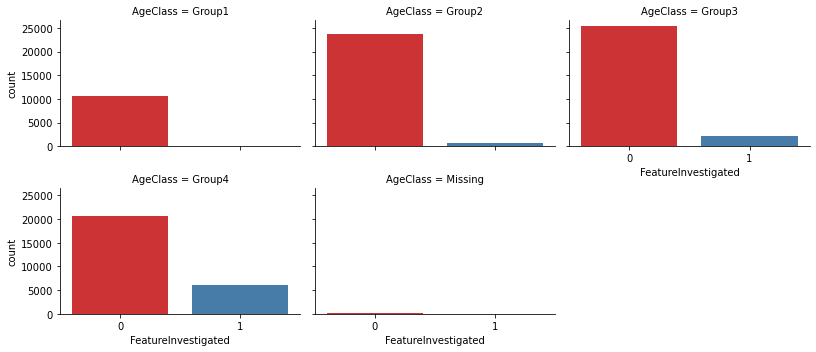

In [109]:
plt.figure(figsize=(10, 4))
sns.catplot(data = df.sort_values(by= 'AgeClass'),
            x ='FeatureInvestigated', kind= 'count', palette='Set1', col= 'AgeClass' ,
            col_wrap= 3, height=2.5, aspect=1.5)
plt.show()

## Decision Tree using python sickit learn

In [133]:
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [139]:
df_copy= df.copy()

In [140]:
le = LabelBinarizer()
transformed= le.fit_transform(df_copy['FeatureInvestigated'])

ohe_df = pd.DataFrame(transformed, columns= ['FeatureInvestigated_encode'])
data = pd.concat([df, ohe_df], axis=1).drop(['FeatureInvestigated'], axis=1)


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89460 entries, 0 to 89459
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AgeClass                    89460 non-null  object
 1   DurationClass               89460 non-null  object
 2   Rating                      89460 non-null  object
 3   cube_level                  89460 non-null  object
 4   payments_per_year           89460 non-null  object
 5   product1                    89460 non-null  int64 
 6   product2                    89460 non-null  int64 
 7   product3                    89460 non-null  int64 
 8   product4                    89460 non-null  int64 
 9   contact_info_edm            89460 non-null  int64 
 10  contact_info_tm             89460 non-null  int64 
 11  customers                   89460 non-null  int64 
 12  FeatureInvestigated_encode  89460 non-null  int32 
dtypes: int32(1), int64(7), object(5)
memory usage:

In [450]:
ohe_columns = df_copy.columns[~df_copy.columns.isin(['customers', 'FeatureInvestigated'])].tolist()
df_model = pd.get_dummies(df_copy, columns= ohe_columns, drop_first=False)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89460 entries, 0 to 89459
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   customers               89460 non-null  int64
 1   FeatureInvestigated     89460 non-null  int64
 2   AgeClass_Group1         89460 non-null  uint8
 3   AgeClass_Group2         89460 non-null  uint8
 4   AgeClass_Group3         89460 non-null  uint8
 5   AgeClass_Group4         89460 non-null  uint8
 6   AgeClass_Missing        89460 non-null  uint8
 7   DurationClass_0         89460 non-null  uint8
 8   DurationClass_1         89460 non-null  uint8
 9   DurationClass_10 to14   89460 non-null  uint8
 10  DurationClass_15 to 19  89460 non-null  uint8
 11  DurationClass_2         89460 non-null  uint8
 12  DurationClass_20 to 29  89460 non-null  uint8
 13  DurationClass_3         89460 non-null  uint8
 14  DurationClass_30+       89460 non-null  uint8
 15  DurationClass_4    

In [464]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


X = df_cat.drop(columns = 'FeatureInvestigated', axis = 1)
y= df_cat['FeatureInvestigated']

genTree = DecisionTreeClassifier(criterion="entropy", max_depth=5) #max_depth is maximum number of levels in the tree

genTree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

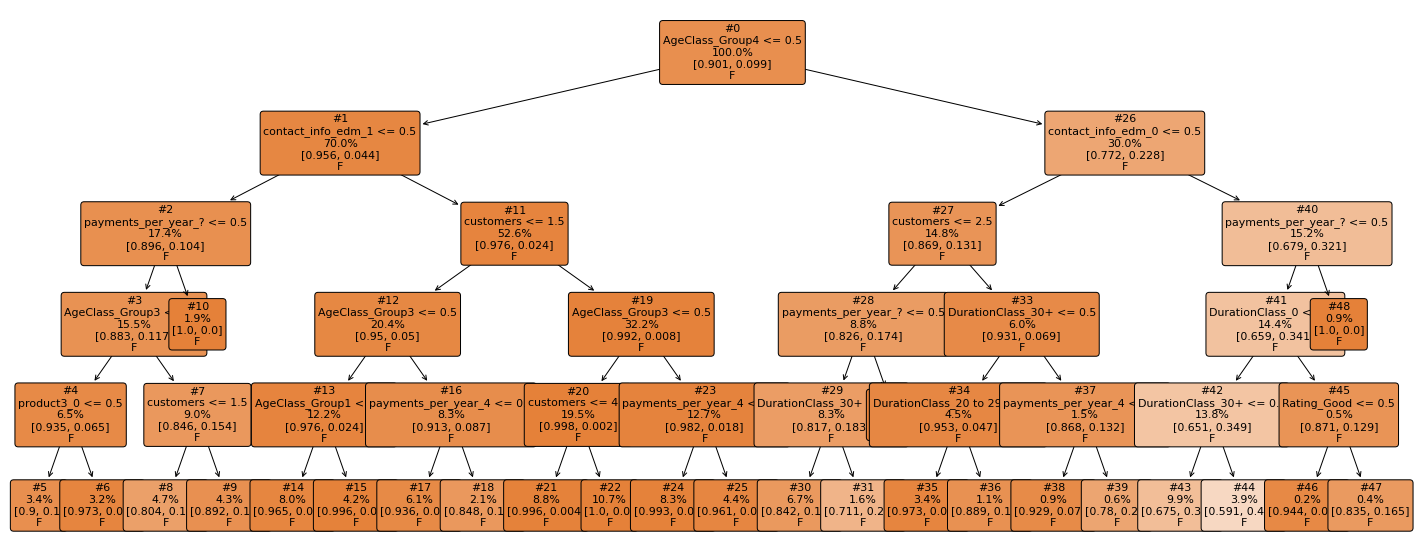

In [465]:
featureNames = X.columns
targetNames = 'FeatureInvestigated'

plt.figure(figsize=(25,10))
a = plot_tree(genTree, 
              feature_names=featureNames, 
              class_names=targetNames, 
              max_depth = 5,
              label =True,
              impurity = None, proportion= True,
              filled=True, 
              rounded=True, node_ids=True, 
              fontsize=11)

In [462]:
??plot_tree